In [1]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from PIL import Image

In [3]:
train_dir = "E:/Deep_learning Dataset/X-ray/train"
val_dir = "E:/Deep_learning Dataset/X-ray/val"

In [5]:
img_height = 224
img_width = 224
batch_size = 32
num_classes = len(os.listdir(train_dir))  # Number of classes (folders in train_dir)

# Data augmentation and generators
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
   
)

val_datagen = ImageDataGenerator(rescale=1.0/255)
batch_size = 64
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical' 

)

Found 240 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


In [7]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # For multi-class classification
])

C:\Users\Rezaul\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(
    "best_model.keras",
    monitor='val_loss',
    save_best_only=True
)

In [13]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[early_stopping, model_checkpoint]
)

C:\Users\Rezaul\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5282 - loss: 1.7669

C:\Users\Rezaul\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 34s 7s/step - accuracy: 0.5284 - loss: 1.7803 - val_accuracy: 0.0000e+00 - val_loss: 1.1496
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 27s 7s/step - accuracy: 0.5035 - loss: 0.7305 - val_accuracy: 1.0000 - val_loss: 0.4882
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 29s 7s/step - accuracy: 0.5912 - loss: 0.6739 - val_accuracy: 1.0000 - val_loss: 0.4712
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.6590 - loss: 0.6152 - val_accuracy: 0.0000e+00 - val_loss: 0.9784
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.7460 - loss: 0.5672 - val_accuracy: 0.3750 - val_loss: 0.7308
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.8136 - loss: 0.5019 - val_accuracy: 0.0000e+00 - val_loss: 1.0736
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.7884 - loss: 0.4651 - val_accuracy: 0.3750 - val_loss: 0.9531
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.8707 - loss: 0.3509 - val_accuracy: 0.0000e+00 - val_loss: 2.0664


In [17]:
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - accuracy: 1.0000 - loss: 0.4712
Validation Loss: 0.4712
Validation Accuracy: 1.0000


In [19]:
model.save("final_model.keras")

Text(0.5, 1.0, 'Loss')

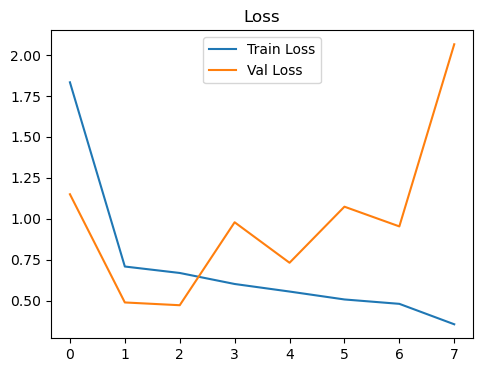

In [21]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

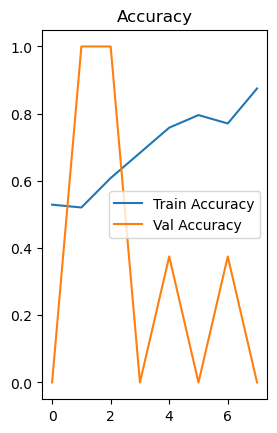

In [23]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

In [25]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def predict_image(image_path):
    img = load_img(image_path, target_size=(img_height, img_width))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    class_labels = list(train_generator.class_indices.keys())
    return class_labels[class_index], prediction[0][class_index]


In [29]:
# Example: Replace 'path_to_image.jpg' with your actual image file path
image_path = "E:/Deep_learning Dataset/X-ray/test/PNEUMONIA/person16_virus_47.jpeg"
predicted_class, confidence = predict_image(image_path)

# Display the output
print(f"Predicted Class: {predicted_class}")
print(f"Confidence Score: {confidence:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
Predicted Class: NORMAL
Confidence Score: 0.59


In [31]:
# Example: Replace 'path_to_image.jpg' with your actual image file path
image_path = "E:/Deep_learning Dataset/X-ray/test/PNEUMONIA/person20_virus_51.jpeg"
predicted_class, confidence = predict_image(image_path)

# Display the output
print(f"Predicted Class: {predicted_class}")
print(f"Confidence Score: {confidence:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predicted Class: NORMAL
Confidence Score: 0.58


In [33]:
image_path = "E:/Deep_learning Dataset/X-ray/test/NORMAL/IM-0007-0001.jpeg"
predicted_class, confidence = predict_image(image_path)

# Display the output
print(f"Predicted Class: {predicted_class}")
print(f"Confidence Score: {confidence:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted Class: NORMAL
Confidence Score: 0.60
